<h1 align="center">House Prices 🏠</h1>

In [1]:
import pandas as pd

In [2]:
base = pd.read_csv('train.csv')

## TRATAMENTO E VISUALIZAÇÃO DOS DADOS

In [3]:
base.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
base.shape

(1460, 81)

In [5]:
base.nunique().sort_values(ascending=True).head(20)

Alley           2
Street          2
Utilities       2
CentralAir      2
MasVnrType      3
HalfBath        3
GarageFinish    3
LandSlope       3
BsmtHalfBath    3
PavedDrive      3
PoolQC          3
ExterQual       4
BsmtQual        4
LotShape        4
BsmtExposure    4
FullBath        4
KitchenQual     4
BsmtFullBath    4
Fireplaces      4
KitchenAbvGr    4
dtype: int64

In [6]:
base.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [7]:
base.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [8]:
base.CentralAir.value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [9]:
base.CentralAir.unique()

array(['Y', 'N'], dtype=object)

In [11]:
base['central_air'] = base.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

In [12]:
base[['CentralAir','central_air']].value_counts()

CentralAir  central_air
Y           1              1365
N           0                95
Name: count, dtype: int64

In [13]:
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageQual      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtFinType1    0.025342
BsmtCond        0.025342
MasVnrArea      0.005479
Electrical      0.000685
HouseStyle      0.000000
dtype: float64

In [14]:
eliminar = base.columns[(base.isnull().sum()/base.shape[0]) > 0.1]
eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [15]:
base = base.drop(eliminar,axis=1)

In [16]:
(base.isnull().sum()/base.shape[0]).sort_values(ascending=False).head(20)

GarageFinish    0.055479
GarageType      0.055479
GarageQual      0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtFinType1    0.025342
BsmtCond        0.025342
MasVnrArea      0.005479
Electrical      0.000685
Neighborhood    0.000000
LotConfig       0.000000
LandSlope       0.000000
LandContour     0.000000
LotShape        0.000000
Street          0.000000
LotArea         0.000000
MSZoning        0.000000
dtype: float64

In [17]:
base.BsmtQual.value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [18]:
base['BsmtQual'] = base['BsmtQual'].fillna('None')

In [19]:
mode_mszoning = base['MSZoning'].mode()[0]

In [20]:
base['MSZoning'] = base['MSZoning'].fillna(mode_mszoning)

In [21]:
bsmt_qual_dummies = pd.get_dummies(base['BsmtQual'], prefix='BsmtQual').astype(int)

In [22]:
base = pd.concat([base, bsmt_qual_dummies], axis=1)

In [23]:
base.drop('BsmtQual', axis=1, inplace=True)

In [24]:
print(base.filter(like='BsmtQual').head())

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None  BsmtQual_TA
0            0            0            1              0            0
1            0            0            1              0            0
2            0            0            1              0            0
3            0            0            0              0            1
4            0            0            1              0            0


In [25]:
base.KitchenQual.value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [26]:
base.KitchenQual.isnull().sum()

np.int64(0)

In [27]:
kitchen_dummies = pd.get_dummies(base['KitchenQual'], prefix='KitchenQual', drop_first=True).astype(int)

In [28]:
base = pd.concat([base, kitchen_dummies], axis=1)

In [29]:
base.drop('KitchenQual', axis=1, inplace=True)

In [30]:
colunas = base.columns[base.dtypes != 'object']

In [31]:
base2 = base.loc[:,colunas]

In [32]:
base2.head(4)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SalePrice,central_air,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,208500,1,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,181500,1,0,0,1,0,0,0,0,1
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,223500,1,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,140000,1,0,0,0,0,1,0,1,0


In [33]:
have_object = base2.columns[base2.dtypes == 'object']
have_object

Index([], dtype='object')

In [34]:
base2.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
LotArea         0
dtype: int64

In [35]:
base2 = base2.fillna({
    "GarageYrBlt": -1,
    "MasVnrArea": 0
})

## CRIANDO MODELO
### Separando treino e teste
 - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [36]:
X = base2.drop('SalePrice',axis = 1)
y = base2.SalePrice

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Algoritmos de Machine Learning

- Regressão Linear
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - Árvore de Regressão
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - KNeighborsRegressor
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

- Regressão Linear

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
reg_rl = LinearRegression().fit(X_train, y_train)

In [41]:
y_rl = reg_rl.predict(X_test)

- Árvore de Regressão

In [42]:
from sklearn import tree

In [43]:
reg_ar = tree.DecisionTreeRegressor(random_state = 42).fit(X_train, y_train)

In [44]:
y_ar = reg_ar.predict(X_test)

- KNeighborsRegressor

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)

In [47]:
y_knn = reg_knn.predict(X_test)

### Avaliando
 - Erro médio absoluto
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
 - Erro quadrático médio
        - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
from sklearn.metrics import mean_squared_error

- Erro na regressão

In [50]:
print(mean_absolute_error(y_test,y_rl))
print(mean_squared_error(y_test,y_rl))

22149.49052981233
1339611769.1731672


- Erro na árvore

In [51]:
print(mean_absolute_error(y_test,y_ar))
print(mean_squared_error(y_test,y_ar))

27113.5622406639
1948929906.4834025


- Erro KNN

In [52]:
print(mean_absolute_error(y_test,y_knn))
print(mean_squared_error(y_test,y_knn))

33273.08298755187
2733937586.841286


In [53]:
import matplotlib.pyplot as plt

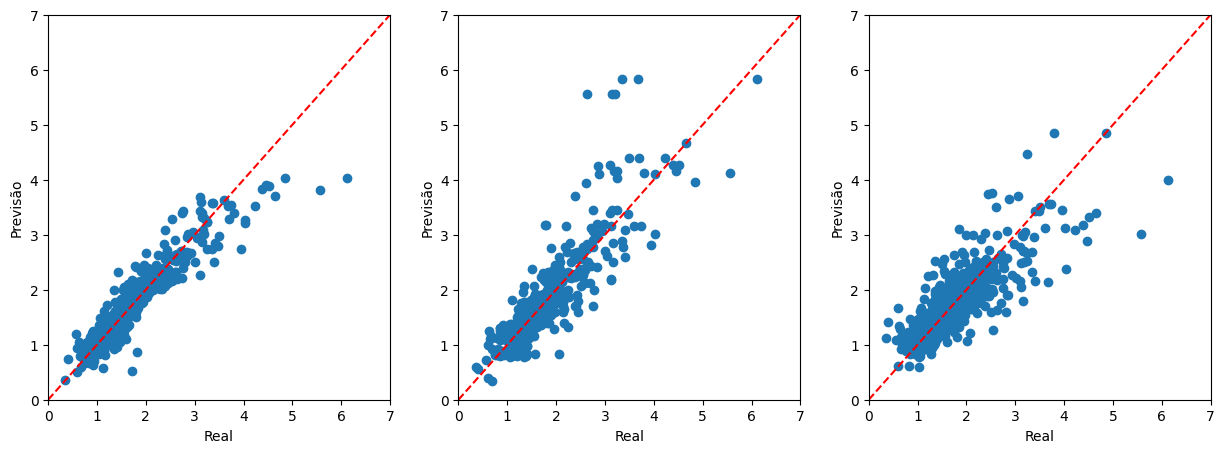

In [54]:
# Criando gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000],[0,700000],'--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000],[0,700000],'--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000],[0,700000],'--r')

ax[0].set(xlim=(0, 7),ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsão')
ax[1].set(xlim=(0, 7),ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsão')
ax[2].set(xlim=(0, 7),ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsão')

plt.show()

## Previsão para base de teste

In [55]:
teste = pd.read_csv('test.csv')

In [56]:
teste.head(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [57]:
teste['central_air'] = teste.CentralAir.apply(lambda x: 1 if x == 'Y' else 0)

In [58]:
teste[['CentralAir','central_air']].value_counts()

CentralAir  central_air
Y           1              1358
N           0               101
Name: count, dtype: int64

In [59]:
teste = teste.drop(eliminar,axis = 1)

In [60]:
teste['BsmtQual'] = teste['BsmtQual'].fillna('None')

In [61]:
mode_mszoning = teste['MSZoning'].mode()[0]

In [62]:
teste['MSZoning'] = teste['MSZoning'].fillna(mode_mszoning)

In [63]:
bsmt_qual_dummies = pd.get_dummies(teste['BsmtQual'], prefix='BsmtQual').astype(int)

In [64]:
teste = pd.concat([teste, bsmt_qual_dummies], axis=1)

In [65]:
teste.drop('BsmtQual', axis=1, inplace=True)

In [66]:
print(teste.filter(like='BsmtQual').head())

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None  BsmtQual_TA
0            0            0            0              0            1
1            0            0            0              0            1
2            0            0            1              0            0
3            0            0            0              0            1
4            0            0            1              0            0


In [67]:
kitchen_dummies = pd.get_dummies(teste['KitchenQual'], prefix='KitchenQual', drop_first=True).astype(int)

In [68]:
teste = pd.concat([teste, kitchen_dummies], axis=1)

In [69]:
teste.drop('KitchenQual', axis=1, inplace=True)

In [70]:
colunas2 = teste.columns[teste.dtypes != 'object']
colunas2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'central_air', 'BsmtQual_Ex', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA', 'KitchenQual_Fa',
       'KitchenQual_Gd', 'KitchenQual_TA'],
      dtype='object')

In [71]:
teste = teste.loc[:, colunas2]

In [72]:
teste.isnull().sum().sort_values(ascending=False).head(15)

GarageYrBlt     78
MasVnrArea      15
BsmtFullBath     2
BsmtHalfBath     2
BsmtFinSF2       1
GarageCars       1
BsmtUnfSF        1
BsmtFinSF1       1
GarageArea       1
TotalBsmtSF      1
OverallCond      0
LotArea          0
OverallQual      0
1stFlrSF         0
YearBuilt        0
dtype: int64

In [73]:
teste = teste.fillna({
    "GarageYrBlt": -1,
    "MasVnrArea": 0
}).fillna(-1)

In [74]:
# regressão linear para fazer a previsão
y_pred = reg_rl.predict(teste)

In [75]:
# adicionar essa coluna de previsão na nossa base
teste['SalePrice'] = y_pred

In [78]:
# E extrair somente o Id e o SalePrice
resultado03 = teste[['Id','SalePrice']]
resultado03.head(3)

,Id,SalePrice
0,1461,118629.809593
1,1462,145891.760494
2,1463,168142.975235


In [79]:
resultado03.to_csv('resultado03.csv',index=False)